In [1]:
# Code is written in Python3 Programming Language and Each Cell is Different/Does Something Different
# This cell imports the necessary libraries/extensions needed to build the AI
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# This cell is where we create the AI's core function called the Perceptron
class Perceprton(object):
    """ 
    Perceptron Classifier.

    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes (epochs) over the training set. 
    random_state : int
        Random number generator used for random weight
        initialization

    Attributes
    -----------
    w_ : 1d-array
        weights after fitting.
    errors_ : list
        number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ 
        Fit method for training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Trainnig vectors where n_samples is the number
            of samples and n_features is the number of 
            features.
        y : {array-like}, shape = [n_samples]
            Target Values.

        Returns
        ----------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """ 
        Calculate the net input.
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ 
        Return class label after unit step (net input).
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
# This cell simply reads the data out of our .CSV file called iris.data 
# The output you see is the last 5 rows (tail) of the spreadsheet with some
# mild reformatting
df = pd.read_csv('iris.data', header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


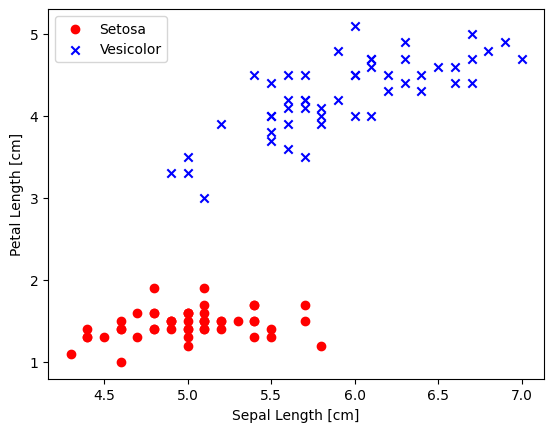

In [4]:
# This cell creates our first plot of class labels (type of flower) and features (axis variables)
# select setosa and versicolor class labels
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
print(df)

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'Vesicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc = 'upper left')
plt.show()

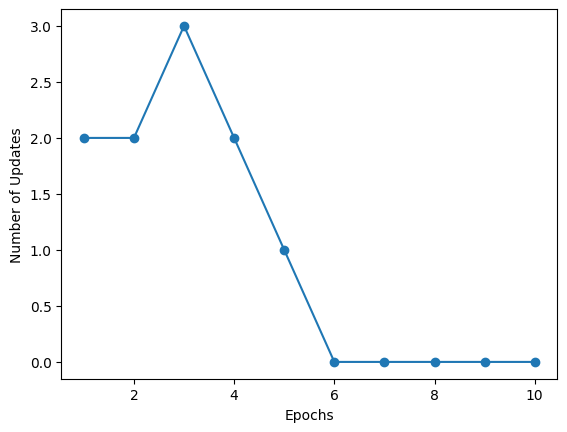

In [5]:
# This cell shows how quickly the AI learns or "converges" until it
# predicts things correctly. Epochs refers to the number of 
# training rounds the AI goes through (epoch = n_iter)
ppn = Perceprton(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

/var/folders/dt/zjrptwdd3f75zzvwrptxntlr0000gn/T/ipykernel_1007/2377830158.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor='black')


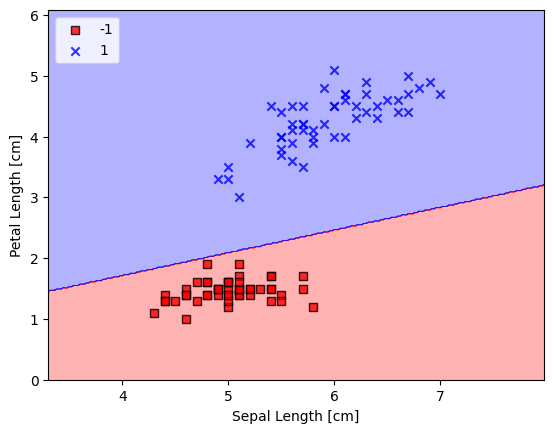

In [6]:
# This cell has some more complex coding but primarily
# it is how we plot the decision boundary (line) that separates
# Iris-setosa (red and squares, -1) from the Iris-versicolor
# (blue and X's, 1) subspecies.
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plotting class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc = 'upper left')
plt.show()
